In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchtext import data, datasets
import spacy
from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm

dev = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
from utils import WMT14En2DeDatasetTokenizer, get_trainer_model
dataset = WMT14En2DeDatasetTokenizer(dev=dev)

Generating src vocab...
Generating trg vocab...
Done.


In [46]:
dl = DataLoader(
    dataset.train,
    shuffle=True,
    batch_size=1,
    collate_fn=dataset.collate_fn)
example =  next(iter(dl))
{a: example[a].shape for a in example}
a = []
for i, batch in enumerate(dl):
    if i > 10000:
        break
    a.append(batch['ntokens'].cpu())
a = np.array(a)

In [54]:
25000 / 5 / a.mean()

194.67727681508677

In [56]:
a.mean() * 5 * 200

25683.531646835316

In [6]:
len(dl)

10743

In [8]:
from transformers.model import EncoderDecoder, Trainer

trainer, model = get_trainer_model(dataset, EncoderDecoder, Trainer, dev=dev)

checkpnt_epoch-2450k.pt
error:  CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.


In [ ]:
f'{sum(p.numel() for p in model.parameters()) / 1e6} * 1e6 parameters'

In [ ]:
trainer.train_loop(1_000_000, batch_size=416, save=True, notify=True)

 50%|#####     | 500001/1000000 [00:00<?, ?it/s]

In [21]:
test_dl = DataLoader(
    dataset.train, shuffle=True, batch_size=1, collate_fn=dataset.collate_fn)
example =  next(iter(test_dl))

src = example['src']
src_mask = example['src_mask']

model.eval()
trg = model.translate(
    src, src_mask, dataset, dev=dev)
dataset.itos(src[0], field='src'), dataset.itos(trg[0])

('<s> A blue bird is flying through the trees. </s>', '<s> einem </s>')

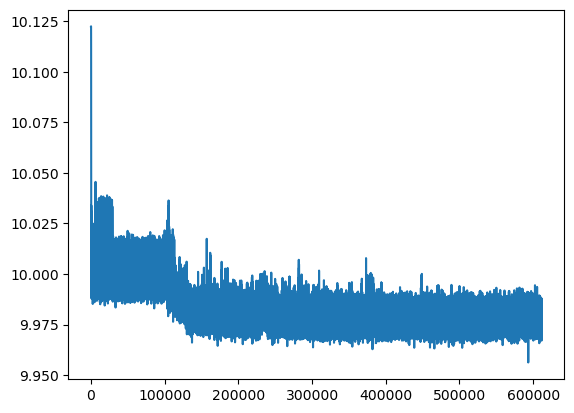

In [12]:
plt.plot(trainer.losses)